# Mount Drive Folder

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch

/content/gdrive/My Drive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch


# Importazione dataset kaggle 

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir .kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle datasets download -d arnaud58/flickrfaceshq-dataset-ffhq

100% 19.5G/19.5G [02:58<00:00, 108MB/s]
100% 19.5G/19.5G [02:58<00:00, 117MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

# Install requirements

In [3]:
%%capture
!pip install dominate torchgeometry func-timeout tqdm matplotlib opencv_python lmdb numpy GPUtil Pillow scikit-learn visdom ninja

# Training 




> ## Full-size 256x256 



In [ ]:
import os
directory_path = 'datasets/ffhq2/'
print(len(os.listdir(directory_path)))


3161


In [ ]:
!python -m experiments ffhq train ffhq256_default

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Gen RAM Free: 12.4 GB  |     Proc size: 96.0 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total     15109MB


> ## Half-size 512x512








In [ ]:
!python -m experiments ffhq train ffhq256_default

# Simple Swapping Interpolation

Using /root/.cache/torch_extensions/py37_cu113 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py37_cu113/fused/build.ninja...
Building extension module fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module fused...
Loading custom kernel...
Using /root/.cache/torch_extensions/py37_cu113 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py37_cu113/upfirdn2d/build.ninja...
Building extension module upfirdn2d...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module upfirdn2d...
parsing args...
----------------- Options ---------------
            R1_once_every: 16                            
               batch_size: 1   

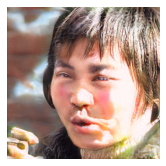

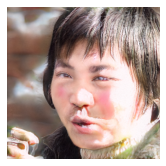

In [9]:
!python test.py --evaluation_metrics simple_swapping \
--preprocess scale_shortside --load_size 512 \
--name ffhq512_default \
--input_structure_image "./testphotos/style/08624.png" \
--input_texture_image "./testphotos/prova/08576.png" \
--result_dir "result/RisFin" \
--texture_mix_alpha 0.0 0.25 0.5 0.75 1.0 \
--global_code_ch=2048 \
--netG_scale_capacity=1.0 \
--netE_num_downsampling_sp=4 \
--netE_scale_capacity=1.0
#--patch_size=128 \


from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image

Image1 = "result/RisFin/ffhq512_default/simpleswapping/08624_08576_0.00.png"
#Image2 = "result/RisFin/ffhq512_default/simpleswapping/faccia1_08592_0.25.png"
#Image3 = "result/RisFin/ffhq512_default/simpleswapping/faccia1_08592_0.50.png"
#Image4 = "result/RisFin/ffhq512_default/simpleswapping/faccia1_08592_0.75.png"
Image5 = "result/RisFin/ffhq512_default/simpleswapping/08624_08576_1.00.png"

arr= [Image1,Image5]
fig = plt.figure()

for img in arr:
  plt.subplot(1,2,2) # <-------
  img = image.load_img(img, target_size=(256,256))
  plt.axis('off')
  plt.imshow(img)
  plt.show()



# Reconstruction + Swapping

Using /root/.cache/torch_extensions/py37_cu113 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py37_cu113/fused/build.ninja...
Building extension module fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Traceback (most recent call last):
  File "/usr/lib/python3.7/subprocess.py", line 1019, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.7/subprocess.py", line 1653, in _wait
ninja: build stopped: interrupted by user.
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.7/subprocess.py", line 1611, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test.py", line 7, in <module>
    opt = TestOptions().parse()
  File "/content/gdrive/MyDrive/ColabNotebooks/MLproject/Swap

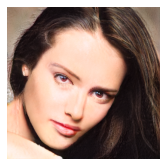

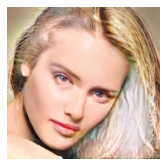

In [5]:
!python test.py --evaluation_metrics simple_swapping \
--preprocess scale_shortside --load_size 512 \
--name ffhq512_default \
--input_structure_image "./testphotos/prova/faccia1.jpg" \
--input_texture_image "./testphotos/style/08592.png" \
--result_dir "result/RisFin" \
--texture_mix_alpha 0.0 0.25 0.5 0.75 1.0 \
--global_code_ch=2048 \
--netG_scale_capacity=1.0 \
--netE_num_downsampling_sp=4 \
--netE_scale_capacity=1.0
#--patch_size=128 \


from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image

Image1 = "result/RisFin/ffhq512_default/simpleswapping/faccia1_08592_0.00.png"
Image2 = "result/RisFin/ffhq512_default/simpleswapping/faccia1_08592_1.00.png"
arr= [Image1,Image2]
fig = plt.figure()

for img in arr:
  plt.subplot(1,2,2) # <-------
  img = image.load_img(img, target_size=(256,256))
  plt.axis('off')
  plt.imshow(img)
  plt.show()


# Crea Gif iterazioni

In [ ]:
!pip install plotnine
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import imageio
from plotnine import *   # plotting
from google.colab import files   # file download

In [ ]:
import os
import fnmatch

images = list()

for path,dirs,files in sorted(os.walk('./checkpoints/ffhq512_default/snapshots')):
    for f in fnmatch.filter(files,'0000.png'):
        fullname = os.path.abspath(os.path.join(path,f))
        print(fullname)
        images.append(imageio.imread(fullname))

imageio.mimsave("gapminer.gif", images, fps=1)

#for y in years:
    #images.append(imageio.imread('year' + str(y) + '.png'))
#imageio.mimsave("gapminer.gif", images)

/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch/checkpoints/ffhq512_default/snapshots/test_210k/images/0000.png
/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch/checkpoints/ffhq512_default/snapshots/test_215k/images/0000.png
/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch/checkpoints/ffhq512_default/snapshots/test_220k/images/0000.png
/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch/checkpoints/ffhq512_default/snapshots/test_225k/images/0000.png
/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch/checkpoints/ffhq512_default/snapshots/test_230k/images/0000.png
/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-pytorch/checkpoints/ffhq512_default/snapshots/test_235k/images/0000.png
/content/gdrive/MyDrive/ColabNotebooks/MLproject/SwappingAE/swapping-autoencoder-p

# Evaluation FID + SIFID

In [ ]:
!python -m experiments ffhq512_pretrained test swapping_for_eval

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'experiments.__main__' found in sys.modules after import of package 'experiments', but prior to execution of 'experiments.__main__'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
CUDA_VISIBLE_DEVICES=0 python test.py  --dataroot ./ --dataset_mode imagefolder --checkpoints_dir ./checkpoints/ --num_gpus 1 --batch_size 1 --preprocess resize --load_size 512 --crop_size 512 --name ffhq512_default --evaluation_metrics swap_generation_from_arranged_result 
Using /root/.cache/torch_extensions/py37_cu113 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py37_cu113/fused/build.ninja...
Building extension module fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module fused...
Loading custom kernel...
Using /root/.cache/torch_extensions/py3

In [ ]:
!pip install pytorch-fid

In [ ]:
!python -m pytorch_fid "./datasets/ffhq2/" "./results/ffhq512_pretrained/swapgenerationfromarrangedresult/test_latest/images/" --dims 2048 --device cuda:0

100% 64/64 [00:47<00:00,  1.35it/s]
100% 2/2 [00:02<00:00,  1.04s/it]
FID:  103.88177109106175


In [ ]:
!python -m pytorch_fid "./datasets/ffhq2/" "./datasets/ffhq/" --dims 2048 --device cuda:0

100% 64/64 [00:47<00:00,  1.34it/s]
100% 142/142 [03:55<00:00,  1.66s/it]
FID:  3.33872552571313


In [ ]:
!python SIFID.py --path2real "./testphotos/prova" --path2fake "result/RisFin/ffhq256_default2/simpleswapping" #--images_suffix "png"

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100% 1/1 [00:00<00:00,  2.41it/s]
100% 1/1 [00:00<00:00, 40.73it/s]
faccia1
SIFID:  1.6635402
